# 02 – Preprocessing & Feature Engineering
### Car Price Prediction Using Machine Learning
Group Assignment 02 - CCS3012 - Data Analytics  
Submission Date: 16th September 2025

---

### **Group 11**
-  **FC211034 - N.D. Samararathne Kodikara**
-  **FC211013 - N.W.V. Tharindu Pabasara**
-  **FC211025 - W.M.M.C.B. Wijesundara**



---

### **Supervisor**
**Ms. Dilmi Praveena**  
*Faculty of Computing*  
*University of Sri Jayewardenepura*

---



## 📌 Objectives

This notebook builds upon the cleaned dataset produced in **Notebook 01 — Data Exploration & Cleaning**.  
The focus here is on understanding the dataset more deeply, validating insights statistically, and preparing features for modeling.  

---

###  1. Descriptive Analytics  
- Summarize numerical variables.  
- Explore categorical variables.  
- Visualize distributions.  
- Examine bivariate relationships.  

###  2. Inferential Analytics  
- Perform hypothesis testing to assess whether differences between groups are statistically significant.  
- Check correlation strength and direction.  
- Identify potential multicollinearity issues between predictors.  

###  3. Feature Engineering  
- Create new features.  
- Extract useful info from text-based or categorical columns.  
- Handle skewed features.  
- Generate interaction terms if useful.  

###  4. Preprocessing Setup  
- Encode categorical variables.  
- Normalize/scale numerical features. 
- Standardize target variable if needed.  

###  5. Train/Test Split  
- Split dataset into **training** and **testing** sets for unbiased model evaluation.  
- Save processed datasets and transformation pipeline for **Notebook 03 — Modeling**.  



> By the end of this notebook, we will have a **fully processed dataset** with engineered and encoded features, ready for predictive modeling.  

---


### 📂 Input  
- `clean_data.csv` saved in `Data/processed/`  


### 📦 Output  


---

### 📊 Dataset Overview
**Dataset:** Car price dataset cleaned.  
**columns include**:   
- `id`, `price` (target variable),  `levy`,  `manufacturer`,  `model`,  `prod_year`,  `category`,  `leather_interior`,  `fuel_type`, `engine_volume`,  `mileage`,  `cylinders`,  `gear_box_type`,  `drive_wheels`,  `doors`,  `wheel`, `color`,  `airbags`,  `turbo` (derived in Notebook 01)


> **Dataset stats:** 19,237 rows × 19 features | Target variable: `price` | Problem type: Regression


## Setup & imports

In [51]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Statistical functions
from scipy import stats

from prettytable import PrettyTable # For creating formatted tables in the console.
from tabulate import tabulate
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)


In [52]:
# Next we load the cleaned dataset.
df = pd.read_csv("./Data/processed/clean_data.csv")

In [53]:
# Prints the first 5 rows of the DataFrame.
df.head()

,id,price,levy,manufacturer,model,prod_year,category,leather_interior,fuel_type,engine_volume,mileage,cylinders,gear_box_type,drive_wheels,doors,wheel,color,airbags,turbo
0,45654403,13328,1399.0,lexus,rx 450,2010,jeep,yes,hybrid,3.5,186005,6,automatic,4x4,04-may,left wheel,silver,12,False
1,44731507,16621,1018.0,chevrolet,equinox,2011,jeep,no,petrol,3.0,192000,6,tiptronic,4x4,04-may,left wheel,black,8,False
2,45774419,8467,0.0,honda,fit,2006,hatchback,no,petrol,1.3,200000,4,variator,front,04-may,right-hand drive,black,2,False
3,45769185,3607,862.0,ford,escape,2011,jeep,yes,hybrid,2.5,168966,4,automatic,4x4,04-may,left wheel,white,0,False
4,45809263,11726,446.0,honda,fit,2014,hatchback,yes,petrol,1.3,91901,4,automatic,front,04-may,left wheel,silver,4,False


In [54]:
# Prints the name of each column in the dataset, the number of non-null values it contains, and its data type.
def df_info(df):
    table = PrettyTable()
    table.field_names = ["Column", "Non-Null Count", "Dtype"]

    for col in df.columns:
        non_null_count = df[col].count()
        dtype = df[col].dtype
        table.add_row([col, non_null_count, dtype])

    print(table)

df_info(df)

+------------------+----------------+---------+
|      Column      | Non-Null Count |  Dtype  |
+------------------+----------------+---------+
|        id        |     15697      |  int64  |
|      price       |     15697      |  int64  |
|       levy       |     15697      | float64 |
|   manufacturer   |     15697      |  object |
|      model       |     15697      |  object |
|    prod_year     |     15697      |  int64  |
|     category     |     15697      |  object |
| leather_interior |     15697      |  object |
|    fuel_type     |     15697      |  object |
|  engine_volume   |     15697      | float64 |
|     mileage      |     15697      |  int64  |
|    cylinders     |     15697      |  int64  |
|  gear_box_type   |     15697      |  object |
|   drive_wheels   |     15697      |  object |
|      doors       |     15697      |  object |
|      wheel       |     15697      |  object |
|      color       |     15697      |  object |
|     airbags      |     15697      |  i

💡 **Observations:**  
- The data set appears unchanged and matches the previously saved version.

Le't start...

# Numerical Features
**Features to analyze: price, levy, mileage, engine_volume, cylinders, airbags, prod_year**

### Analyze `price`

In [55]:
# Summary statistics
price_stats = df['price'].describe()
print("Price Summary:\n", price_stats)

# other metrics
print("\nSkewness:", df['price'].skew())
print("Kurtosis:", df['price'].kurt())

Price Summary:
 count    1.569700e+04
mean     2.028445e+04
std      2.108237e+05
min      1.000000e+00
25%      7.527000e+03
50%      1.426900e+04
75%      2.338900e+04
max      2.630750e+07
Name: price, dtype: float64

Skewness: 123.52934090055949
Kurtosis: 15402.583002061287


💡 **Observations:**  
- The mean price is around $20,284, while the median is $14,269, indicating a right-skewed distribution.
- The minimum price is $1 (likely an error or placeholder), and the maximum is $26,307,500, suggesting the presence of extreme outliers.  
- The standard deviation is very high ($210,823), reflecting large variability in car prices.

---
- Skewness = 123.53 → extremely right-skewed.

- Kurtosis = 15,402.58 → heavy tails, confirming extreme outliers.

> *🧠 we will Consider log transformation now and outlier handling in Feature engineering*

In [56]:
# Initialize list for skewed features
skewed_features = []

# Example: add 'price' after detecting skew
skewed_features.append('price')

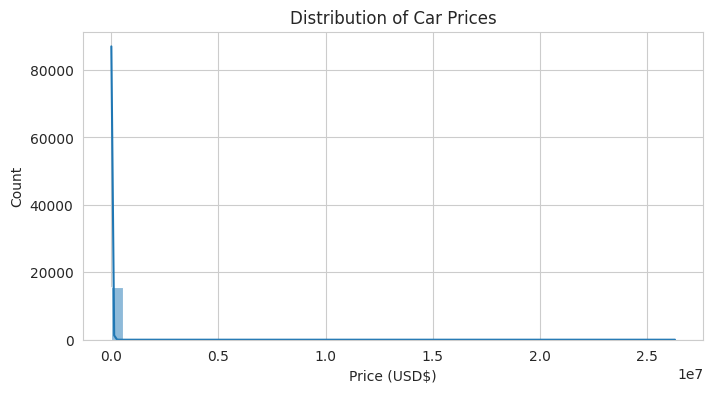

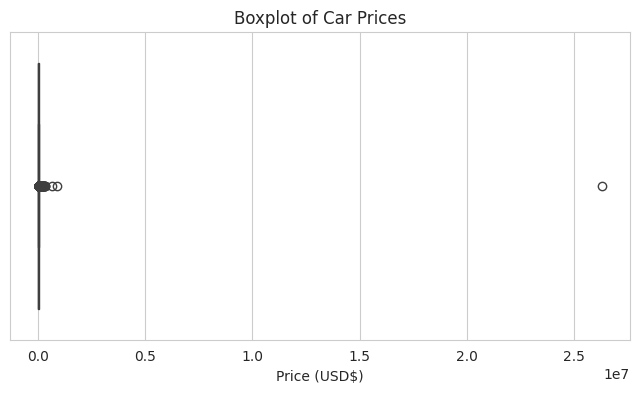

In [57]:
plt.figure(figsize=(8,4))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Distribution of Car Prices")
plt.xlabel("Price (USD$)")
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x=df['price'])
plt.title("Boxplot of Car Prices")
plt.xlabel("Price (USD$)")
plt.show()


💡 **Observations:**  
- The raw price distribution is highly skewed, with extreme outliers reaching up to 26M USD.
This makes the plots look compressed, hiding the majority of the data.
> *🧠 To better visualize the bulk of the dataset, we zoom into the 95th percentile, which removes the top 5% of extreme values from the plot (without actually deleting them from the dataset).*

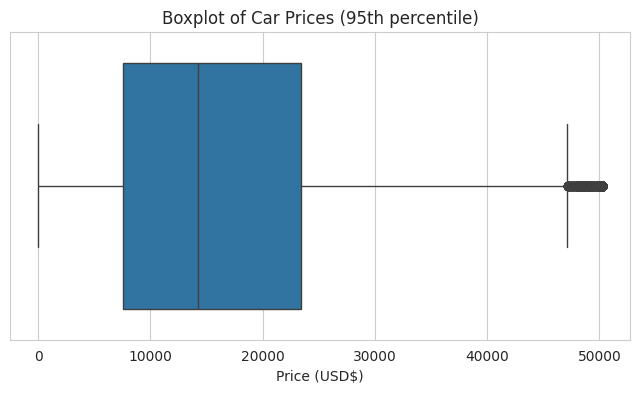

In [58]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['price'].clip(upper=df['price'].quantile(0.95)))
plt.title("Boxplot of Car Prices (95th percentile)")
plt.xlabel("Price (USD$)")
plt.show()


💡 **Observations:**  

- The majority of car prices fall between $18,000 and $24,000.

- Extreme luxury or rare vehicles drive the distribution’s long right tail.

- The bulk of the dataset represents typical consumer vehicles, not high-end outliers.

### Analyze `levy`

In [59]:
# Summary stats
print("Levy Summary:\n", df['levy'].describe())

# Skewness & Kurtosis
print("\nSkewness:", df['levy'].skew())
print("Kurtosis:", df['levy'].kurt())

Levy Summary:
 count    15697.000000
mean       562.179716
std        558.754267
min          0.000000
25%          0.000000
50%        639.000000
75%        862.000000
max      11714.000000
Name: levy, dtype: float64

Skewness: 2.9599056127478742
Kurtosis: 38.99045800451407


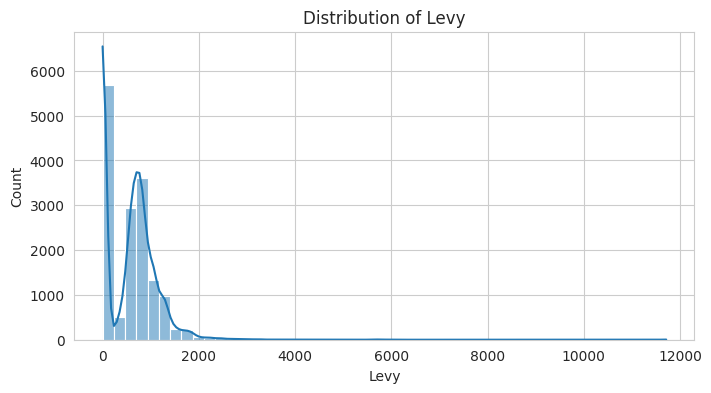

In [60]:

# Histogram
plt.figure(figsize=(8,4))
sns.histplot(df['levy'], bins=50, kde=True)
plt.title("Distribution of Levy")
plt.xlabel("Levy")
plt.show()

**💡 Observations**

- Median (639) is higher than the mean (562), showing a concentration of lower values with a long right tail.

- 25% of cars have levy = 0.

- Distribution is moderately skewed (Skewness ≈ 2.96) with heavy tails (Kurtosis ≈ 39), suggesting strong outliers.

- The maximum levy (11,714) is far beyond the 75th percentile (862), indicating presence of extreme values.

> *🧠 Investigate whether levy = 0 should be treated as missing.*

#### 🔍 Investigating levy = 0


> Objective: Determine whether levy = 0 represents a true zero or indicates missing/unknown values.

In [61]:
def zero_count_percentage(df, column):
    zero_count = (df[column] == 0).sum()
    zero_pct = zero_count / len(df) * 100
    print(f"{column} = 0 → {zero_count} rows ({zero_pct:.2f}%)")

# Example usage:
zero_count_percentage(df, 'levy')

levy = 0 → 5659 rows (36.05%)


💡 **Observations:**  
- levy = 0 occurs in 5,659 rows, which is 36.05% of the dataset.
- This is a substantial portion, so we need to investigate whether these zeros are true exemptions (e.g., for certain car years or categories) or missing/unknown values.

> *🧠 Further analysis with car age, price, and category will guide whether to keep, impute, or flag these zeros in preprocessing.*

In [62]:
# 🍀 Create car_age column
current_year = 2025  # or use datetime.now().year
df['car_age'] = current_year - df['prod_year']

# Define bins and labels
bins = [0, 5, 10, 15, 20, 30, 50]
labels = ['0-5', '6-10', '11-15', '16-20', '21-30', '31-50']
df['car_age_group'] = pd.cut(df['car_age'], bins=bins, labels=labels, right=True)

# Proportion of levy=0 by age group
levy_zero_by_age = df.groupby(age_groups, observed=True)['levy'].apply(lambda x: (x==0).mean())

# Convert to DataFrame for tabulate
levy_table = levy_zero_by_age.reset_index()
levy_table.columns = ['Car Age Group', 'Proportion of levy=0']

# Print table
print(tabulate(levy_table, headers='keys', tablefmt='grid', showindex=False))


+-----------------+------------------------+
| Car Age Group   |   Proportion of levy=0 |
+=================+========================+
| 0-5             |              0.186047  |
+-----------------+------------------------+
| 6-10            |              0.0910034 |
+-----------------+------------------------+
| 11-15           |              0.215335  |
+-----------------+------------------------+
| 16-20           |              0.648907  |
+-----------------+------------------------+
| 21-30           |              0.950131  |
+-----------------+------------------------+
| 31-50           |              0.97619   |
+-----------------+------------------------+


**💡 Observations**

- Newer cars (0–5 years) have a relatively low proportion of levy=0 (≈18.6%).

- Levy=0 is relatively low for newer cars (0–15 years) but rises sharply for older cars.

- 21–30 years old cars and 31–50 years old cars almost entirely have levy=0, which may reflect obsolete or missing levy data for very old cars.

> *🧠 Levy=0 is strongly correlated with car age.*

> *🧠 most likely represent missing values for old cars*

### Analyze `mileage`



In [63]:
# Summary
print(f"🔹 Summary of Mileage:")
print(df['mileage'].describe())

# Skewness & Kurtosis

print(f"\nSkewness:", df['mileage'].skew())
print(f"Kurtosis:", df['mileage'].kurt())

🔹 Summary of Mileage:
count    1.569700e+04
mean     1.702692e+06
std      5.076913e+07
min      0.000000e+00
25%      6.660300e+04
50%      1.210000e+05
75%      1.800000e+05
max      2.147484e+09
Name: mileage, dtype: float64

Skewness: 36.49133828011965
Kurtosis: 1415.1470456264244


💡 **Observations:**  
- The distribution of mileage is extremely right-skewed (skew ≈ 36.5) with very high kurtosis (≈1415), indicating the presence of extreme outliers.

- Median mileage (≈121,000 km) is much lower than the mean (≈1,702,000 km), reinforcing skewness.

- Minimum value is 0 km — likely representing brand new cars or missing data.

- Maximum value (≈2.1×10⁹ km) is clearly unrealistic and represents outliers.

In [64]:
# add as a skewd feature to handle later
skewed_features.append('mileage')

> *🧠 To better visualize the bulk of the dataset, we zoom into the 95th percentile, which removes the top 5% of extreme values from the plot (without actually deleting them from the dataset).*

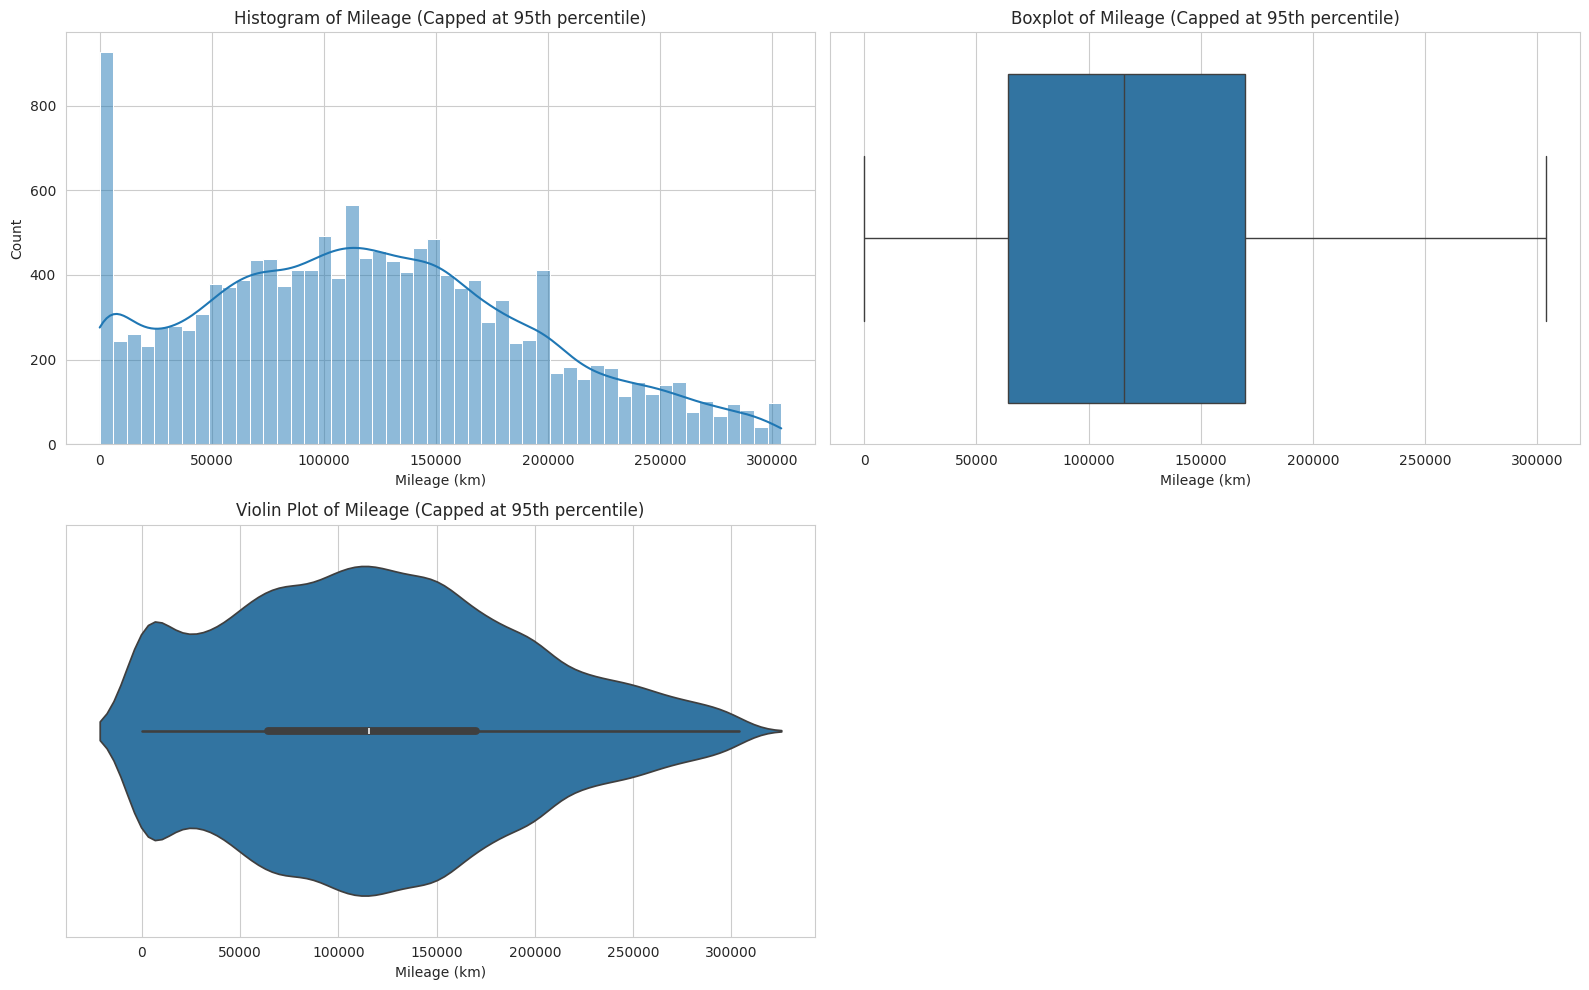

In [65]:
# Calculate 95th percentile
mileage_95 = df['mileage'].quantile(0.95)

# Filter mileage for plotting
mileage_capped = df[df['mileage'] <= mileage_95]['mileage']

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Histogram
sns.histplot(mileage_capped, bins=50, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Histogram of Mileage (Capped at 95th percentile)")
axes[0, 0].set_xlabel("Mileage (km)")
axes[0, 0].set_ylabel("Count")

# Boxplot
sns.boxplot(x=mileage_capped, ax=axes[0, 1])
axes[0, 1].set_title("Boxplot of Mileage (Capped at 95th percentile)")
axes[0, 1].set_xlabel("Mileage (km)")

# Violin plot
sns.violinplot(x=mileage_capped, ax=axes[1, 0])
axes[1, 0].set_title("Violin Plot of Mileage (Capped at 95th percentile)")
axes[1, 0].set_xlabel("Mileage (km)")

# Remove empty subplot (bottom-right)
fig.delaxes(axes[1, 1])

plt.tight_layout()
plt.show()


💡 **Observations:**  
- The histogram shows a right-skewed distribution with a large number of cars clustered at lower mileages.
- especially for `mileage == 0`  
- The violin plot shows the density of mileage values; there is a noticeable spike at very low mileage, likely representing newer or very lightly used cars.

> *🧠 Let's explore the `mileage == 0` case*

In [66]:
zero_count_percentage(df, 'mileage')

# Proportion of mileage = 0 by car age group
mileage_zero_by_age = df.groupby(age_groups, observed=True)['mileage'].apply(lambda x: (x==0).mean())


# Convert to DataFrame for tabulate
mileage_table = mileage_zero_by_age.reset_index()
mileage_table.columns = ['Car Age Group', 'Proportion of mileage = 0']

# Print table
print(f"\n🔹 Proportion of mileage = 0 by car age group:")
print(tabulate(mileage_table, headers='keys', tablefmt='grid', showindex=False))

mileage = 0 → 605 rows (3.85%)

🔹 Proportion of mileage = 0 by car age group:
+-----------------+-----------------------------+
| Car Age Group   |   Proportion of mileage = 0 |
+=================+=============================+
| 0-5             |                   0.116279  |
+-----------------+-----------------------------+
| 6-10            |                   0.0235935 |
+-----------------+-----------------------------+
| 11-15           |                   0.0237862 |
+-----------------+-----------------------------+
| 16-20           |                   0.0391621 |
+-----------------+-----------------------------+
| 21-30           |                   0.100175  |
+-----------------+-----------------------------+
| 31-50           |                   0.142857  |
+-----------------+-----------------------------+


💡 **Observations:**  
- Overall, 3.85% of cars have mileage = 0, indicating a small portion of cars with missing or unreported mileage.
> *🧠  since both old and new cars seems to have `0` mileages this might indicate missing values. especially for old vehicles*

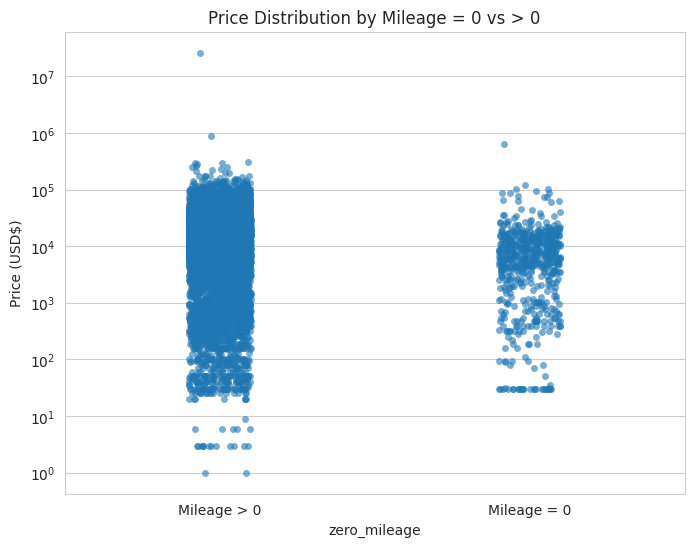

In [67]:
# Add zero mileage marker within the capped dataset
df_capped = df[df['mileage'] <= mileage_95].copy()
df_capped['zero_mileage'] = df_capped['mileage'] == 0

plt.figure(figsize=(8,6))
sns.stripplot(
    x=df_capped['zero_mileage'],
    y=df_capped['price'],
    jitter=True,  # spreads points horizontally for visibility
    alpha=0.6
)
plt.yscale('log')
plt.xticks([0,1], ['Mileage > 0', 'Mileage = 0'])
plt.title("Price Distribution by Mileage = 0 vs > 0")
plt.ylabel("Price (USD$)")
plt.show()

💡 **Observations:**  
- cars with 0 mileage looks to be clustered more near the higher prices. indicating they might actually represent newer cars.

### Analyze `engine_volume`



In [68]:
# Summary
print(f"🔹 Summary of Engine Volume:")
print(df['engine_volume'].describe())

# Skewness & Kurtosis

print(f"\nSkewness:", df['engine_volume'].skew())
print(f"Kurtosis:", df['engine_volume'].kurt())

🔹 Summary of Engine Volume:
count    15697.000000
mean         2.212512
std          0.805126
min          0.000000
25%          1.700000
50%          2.000000
75%          2.500000
max         20.000000
Name: engine_volume, dtype: float64

Skewness: 2.2529346161726593
Kurtosis: 18.58973377341347


💡 **Observations:**  
- Most cars fall between 1.7 L and 2.5 L, with the median at 2.0 L, indicating compact to mid-sized engines dominate.

- The minimum recorded 0.0 L is likely erroneous or missing data, while the maximum of 20.0 L represents an extreme outlier.

The distribution is right-skewed (skewness = 2.25), with a sharp peak and heavy tails (kurtosis = 18.6), suggesting that while most cars cluster around smaller engines, a few very large engine volumes disproportionately affect the spread.

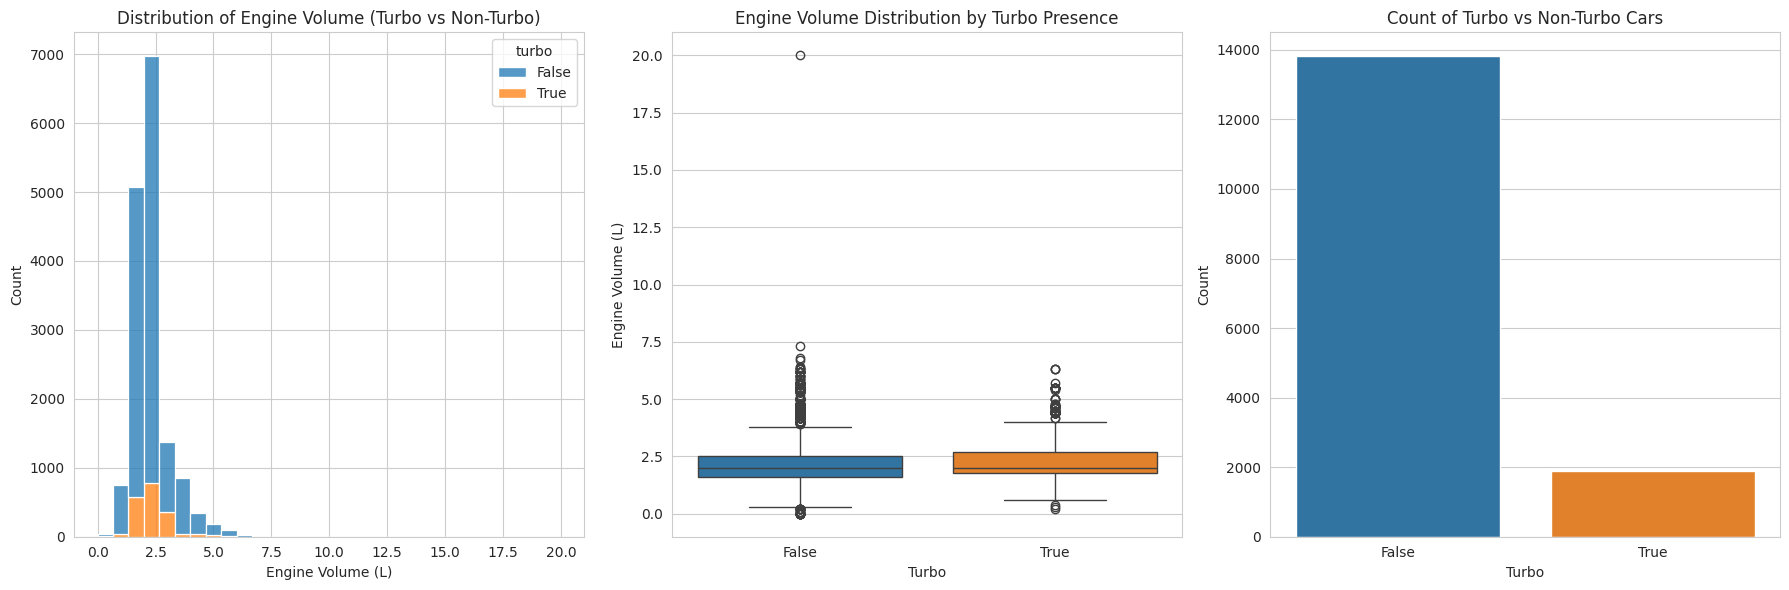

In [69]:
fig, axes = plt.subplots(1, 3, figsize=(18,6))  # 1 row, 3 columns

# Histogram of Engine Volume (Turbo stacked on top)
sns.histplot(
    data=df, 
    hue='turbo',
    x='engine_volume', 
    bins=30, 
    multiple='stack',
    ax=axes[0]
)
axes[0].set_title("Distribution of Engine Volume (Turbo vs Non-Turbo)")
axes[0].set_xlabel("Engine Volume (L)")
axes[0].set_ylabel("Count")

# Boxplot of Engine Volume by Turbo
sns.boxplot(data=df, x='turbo', y='engine_volume', hue='turbo', legend=False, ax=axes[1])
axes[1].set_title("Engine Volume Distribution by Turbo Presence")
axes[1].set_xlabel("Turbo")
axes[1].set_ylabel("Engine Volume (L)")

# Countplot (Turbo vs Non-Turbo counts)
sns.countplot(data=df, x='turbo', hue='turbo', legend=False, ax=axes[2])
axes[2].set_title("Count of Turbo vs Non-Turbo Cars")
axes[2].set_xlabel("Turbo")
axes[2].set_ylabel("Count")

plt.tight_layout()
plt.show()


💡 **Observations:**  
- The `turbo` shows highly imbalanced distribution in `engine volume`

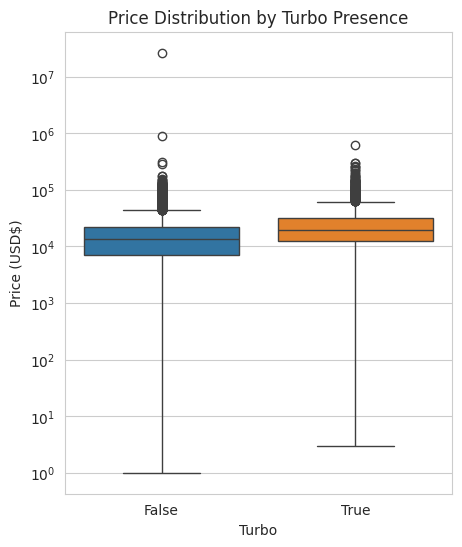

In [70]:
# comparing price vs turbo
plt.figure(figsize=(5,6))
sns.boxplot(data=df, x='turbo', y='price', hue='turbo', legend=False)
plt.yscale("log")
plt.title("Price Distribution by Turbo Presence")
plt.xlabel("Turbo")
plt.ylabel("Price (USD$)")
plt.show()


💡 **Observations:**  
- The cars that features engines with `turbo` tend to be more expensive. This match with real world market.

### Analyze `cylinders`

In [71]:
# cylinders
print(df['cylinders'].value_counts())

# Skewness & Kurtosis
print("\nSkewness:", df['cylinders'].skew())
print("Kurtosis:", df['cylinders'].kurt())

cylinders
4     12265
6      2427
8       600
5       165
3       107
2        42
12       38
1        36
10       12
7         4
9         1
Name: count, dtype: int64

Skewness: 2.2844331455524736
Kurtosis: 7.287691333713516


In [72]:
skewed_features.append('cylinders')

💡 **Observations:**  
- Extreme imbalance, 4-cylinder engines dominate (~12k out of ~16k).
- Odd or unusual values 7-, 9-, 10-, 12-cylinder engines are extremely uncommon. especialy 7 and 9 no car engines exists.
> *🧠 1-, 7- and 9- might be erroneous inputs*

In [73]:
def cylinder_group(c):
    if c < 4:
        return '<4'
    elif c == 4:
        return '4'
    else:
        return '>4'

df['cylinder_group'] = df['cylinders'].apply(cylinder_group)

# Prepare cylinder group counts
cylinder_counts = df['cylinder_group'].value_counts().reset_index()
cylinder_counts.columns = ['Cylinder Group', 'Count']

# Print table
print(tabulate(cylinder_counts, headers='keys', tablefmt='grid', showindex=False))

+------------------+---------+
| Cylinder Group   |   Count |
+==================+=========+
| 4                |   12265 |
+------------------+---------+
| >4               |    3247 |
+------------------+---------+
| <4               |     185 |
+------------------+---------+


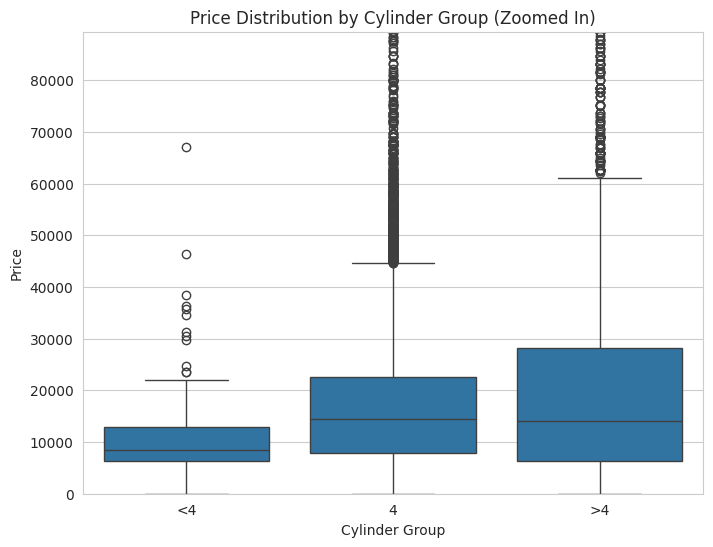

In [74]:
# Determine zoom limit (e.g., 99th percentile)
zoom_limit = df['price'].quantile(0.99)

# Plot
plt.figure(figsize=(8,6))
sns.boxplot(x='cylinder_group', y='price', data=df, order=['<4', '4', '>4'])

# Zoom in
plt.ylim(0, zoom_limit)

plt.title('Price Distribution by Cylinder Group (Zoomed In)')
plt.ylabel('Price')
plt.xlabel('Cylinder Group')
plt.show()

💡 **Observations:**  
- Vehicles with more cylinders tend to have higher prices.

### Analyze `airbags`

In [75]:
print("Unique values:", df['airbags'].unique())

# Skewness & Kurtosis
print("\nSkewness:", df['airbags'].skew())
print("Kurtosis:", df['airbags'].kurt())

Unique values: [12  8  2  0  4  6 10  3  1 16  5  7  9 11 14 15 13]

Skewness: 0.18064110596057084
Kurtosis: -1.1910548536708885


💡 **Observations:**  
-  the data is roughly symmetric.  
> *🧠 To make the visualization clearer, let's group the airbag counts.*

In [76]:
# define groupings
def airbags_group(n):
    if n == 0:
        return '0'
    elif 1 <= n <= 2:
        return '1-2'
    elif 3 <= n <= 4:
        return '3-4'
    elif 5 <= n <= 8:
        return '5-8'
    else:
        return '>8'

df['airbags_group'] = df['airbags'].apply(airbags_group)

# Check counts
print(df['airbags_group'].value_counts())


airbags_group
3-4    5141
>8     5019
5-8    3040
0      1378
1-2    1119
Name: count, dtype: int64


In [77]:
prop_df = (
    df.groupby('car_age_group')['airbags_group']
      .value_counts(normalize=True)
      .unstack()
      .fillna(0)
      .reindex(columns=['0','1-2','3-4','5-8','>8']) 
)

/tmp/ipykernel_9/3200708380.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('car_age_group')['airbags_group']


> *🧠 Let's find out the airbag distribution against price*

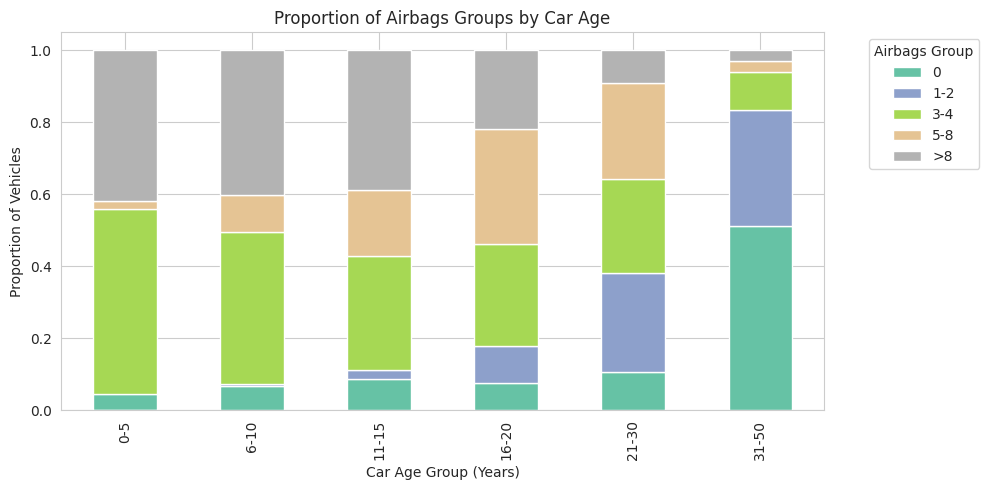

In [ ]:
# plot airbag groups and car age group
prop_df.plot(
    kind='bar', 
    stacked=True, 
    figsize=(10,5), 
    colormap='Set2'
)
plt.title("Proportion of Airbags Groups by Car Age")
plt.xlabel("Car Age Group (Years)")
plt.ylabel("Proportion of Vehicles")
plt.legend(title="Airbags Group", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

💡 **Observations:**  
- Newer cars tend to have more airbags, while older cars have fewer.
- Most vehicles with 0 airbags fall in the 31–50 years age group.



# Categorical Features
**Features to analyze: manufacturer, model, category, leather_interior, fuel_type, gear_box_type, drive_wheels, doors, wheel, color, turbo**